## Supuestos estructurales del Modelo Clásico de Regresión Lineal (MCRL)

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.stats.api as sms

In [2]:
data= pd.read_csv(r"C:\Users\fcecursos\Downloads\Econometria-en-Python-main\Econometria-en-Python-main\Bases de datos\GujaratiPorter71.txt", sep="\t")

In [3]:
data.head()

,CM,FLR,PGNP,TFR
0,128,37,1870,6.66
1,204,22,130,6.15
2,202,16,310,7.00
3,197,65,570,6.25
4,96,76,2050,3.81


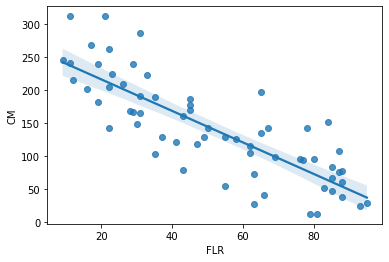

In [4]:
sns.regplot(x = data["FLR"], y = data["CM"]);

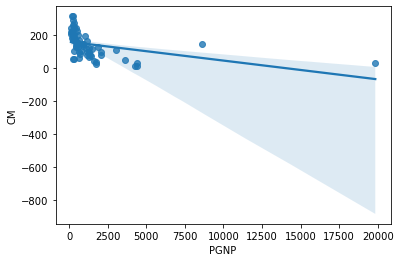

In [5]:
sns.regplot(x = data["PGNP"], y = data["CM"]);

**Supuesto #6: Observaciones mayores a parámetros**

In [6]:
data.shape

(64, 4)

In [7]:
data["CM"][0:3]

0    128
1    204
2    202
Name: CM, dtype: int64

In [8]:
modelo_prueba = sm.OLS(data["CM"][0:3], sm.add_constant(data[["PGNP","FLR","TFR"]][0:3]))
resultado_prueba = modelo_prueba.fit()
print(resultado_prueba.summary())

                            OLS Regression Results                            
Dep. Variable:                     CM   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Thu, 16 Jun 2022   Prob (F-statistic):                nan
Time:                        11:16:49   Log-Likelihood:                 66.188
No. Observations:                   3   AIC:                            -126.4
Df Residuals:                       0   BIC:                            -129.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.2453        inf          0        n

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 3 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1749: RuntimeWarning: divide by zero encountered in true_divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1749: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1671: RuntimeWarning: divide by zero encountered in double_scalars
  return np.dot(wresid, wresid) / self.df_resid


**Supuesto #7: Variabilidad en las variables**

In [9]:
data.describe()

,CM,FLR,PGNP,TFR
count,64.000000,64.000000,64.000000,64.000000
mean,141.500000,51.187500,1401.250000,5.549687
std,75.978067,26.007859,2725.695775,1.508993
min,12.000000,9.000000,120.000000,1.690000
25%,82.000000,29.000000,300.000000,4.607500
50%,138.500000,48.000000,620.000000,6.040000
75%,192.500000,77.250000,1317.500000,6.615000
max,312.000000,95.000000,19830.000000,8.490000


In [10]:
sm.add_constant(data).apply(np.std,axis=0)

const       0.000000
CM         75.382151
FLR        25.803873
PGNP     2704.317439
TFR         1.497158
dtype: float64

In [11]:
pd.DataFrame(sm.add_constant(data).apply(np.std,axis=0),columns=["Desviación Estándar"])

,Desviación Estándar
const,0.000000
CM,75.382151
FLR,25.803873
PGNP,2704.317439
TFR,1.497158


**Supuesto #8: Multicolinealidad**

In [12]:
data.corr()

,CM,FLR,PGNP,TFR
CM,1.000000,-0.818285,-0.407697,0.671135
FLR,-0.818285,1.000000,0.268530,-0.625954
PGNP,-0.407697,0.268530,1.000000,-0.185718
TFR,0.671135,-0.625954,-0.185718,1.000000


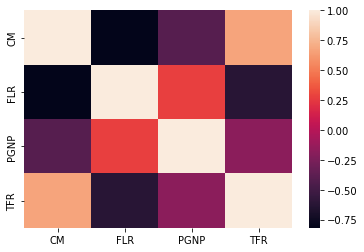

In [13]:
correlaciones = data.corr()
fig,ax=plt.subplots()
sns.heatmap(correlaciones)
plt.show()

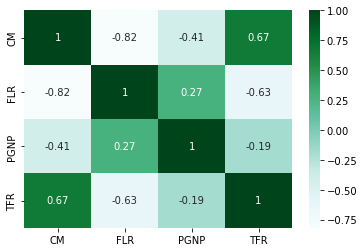

In [14]:
correlaciones = data.corr()
fig,ax=plt.subplots()
sns.heatmap(correlaciones, cmap = "BuGn", annot=True)
plt.show()

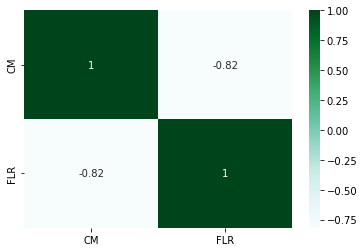

In [15]:
correlaciones = data[["CM","FLR"]].corr()
fig,ax=plt.subplots()
sns.heatmap(correlaciones, cmap = "BuGn", annot=True)
plt.show()

In [16]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["Nombre"] = data.columns

vif_data

,Nombre
0,CM
1,FLR
2,PGNP
3,TFR


In [17]:
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(data.values, i)
                          for i in range(len(data.columns))]
vif_data

,Nombre,VIF
0,CM,12.465787
1,FLR,3.937469
2,PGNP,1.494594
3,TFR,20.210255


**Supuesto de no sesgo de especificación**

In [18]:
modelo1 =sm.OLS(data["CM"],sm.add_constant(data[["PGNP","FLR"]]))
resultados1 = modelo1.fit()
print(resultados1.summary())

                            OLS Regression Results                            
Dep. Variable:                     CM   R-squared:                       0.708
Model:                            OLS   Adj. R-squared:                  0.698
Method:                 Least Squares   F-statistic:                     73.83
Date:                Thu, 16 Jun 2022   Prob (F-statistic):           5.12e-17
Time:                        11:16:51   Log-Likelihood:                -328.10
No. Observations:                  64   AIC:                             662.2
Df Residuals:                      61   BIC:                             668.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        263.6416     11.593     22.741      0.0

In [19]:
valores_estimados=resultados1.predict()
valores_estimados

array([170.51378125, 213.8126422 , 226.18576952, 115.36995402,
        82.46555065, 204.49103764, 159.43700917, 197.23162096,
       238.41655119, 139.26685789,  62.83064509, 135.82243505,
        46.33550355, 187.9688439 ,  85.2594343 ,  77.94355168,
       193.41898868, 105.93541756, 165.31182934, 152.65873384,
       224.06711569, 184.01150442, 131.04752009,  58.94157934,
       197.57041665, 116.1604773 ,  52.44091063, 115.03351989,
       151.92231495,  11.07970932,  73.81681435, 209.32241854,
       103.27571983, 123.30696208, 193.16371113, 107.20944374,
       238.02128956,  55.46065808, 209.46476419, 213.24798272,
       236.07203357, 241.69393775, 188.75936718, 219.54747828,
        57.49343221, 181.13174106,  66.61622518,  84.32656538,
        70.06064802, 188.86993752, 218.70048905, 215.19723871,
        62.33189779,  76.8953893 , 160.11696211,  63.47882272,
       198.84208126,  26.96532178, 164.74953142, 116.98277588,
       161.52624926,  53.45965925, 161.97797684, 110.96

In [20]:
residuos = resultados1.resid
residuos

0    -42.513781
1     -9.812642
2    -24.185770
3     81.630046
4     13.534449
        ...    
59    -1.982776
60    24.473751
61    -6.459659
62    16.022023
63    31.036751
Length: 64, dtype: float64

In [21]:
# Prueba CUSUM para medir cambio estructural 
# (para probar si los coeficientes en un modelo son constantes)

resultados_CUSUM = sms.breaks_cusumolsresid(residuos)
print(resultados_CUSUM)

(0.5191974341185455, 0.9503227705917949, [(1, 1.63), (5, 1.36), (10, 1.22)])


In [22]:
# Para evaluar si la forma funcional es la correcta se utiliza el test de RESET de Ramsey

resultados_RESET = sms.linear_reset(resultados1)
estadistico = resultados_RESET.statistic
p_valor = resultados_RESET.pvalue

nombres = ["Estadístico","p-valor"]
pd.DataFrame([estadistico,p_valor], index = nombres, columns = ["Reset"])

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\stats\diagnostic.py:1081: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  aug = res.fittedvalues[:, None]


,Reset
Estadístico,3.157124
p-valor,0.206272


## Ejercicio

Realice un modelo de regresión lineal con la base de datos Ingreso_Ahorro; adicionalmente, verifique el cumplimiento de los supuesto vistos en clase.

Este archivo de datos contiene información sobre 26 automóviles, a saber, su marca, precio, millas por galón, calificación de reparación (en 1978), peso en libras, longitud en pulgadas y si el automóvil era extranjero o nacional. Aquí está el archivo de datos.

In [23]:
datos_ejercicio=pd.read_csv(r"C:\Users\fcecursos\Downloads\Econometria-en-Python-main (1)\Econometria-en-Python-main\Bases de datos\regression_auto.csv")

In [24]:
datos_ejercicio.head()

,make,mpg,weight,weight1,price,foreign,repairs,length
0,AMC,22,2930,2.93,4099,0,3,186
1,AMC,17,3350,3.35,4749,0,3,173
2,AMC,22,2640,2.64,3799,0,3,168
3,Audi,17,2830,2.83,9690,1,5,189
4,Audi,23,2070,2.07,6295,1,3,174


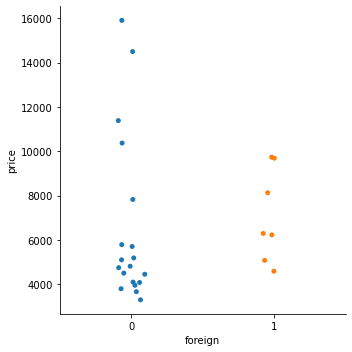

In [25]:
sns.catplot(x="foreign", y="price", data=datos_ejercicio)

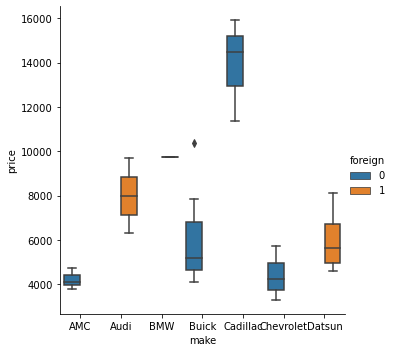

In [26]:
sns.catplot(x="make", y="price", hue="foreign", kind="box", data=datos_ejercicio)

### Modificación de bases de datos

In [28]:
datos_ejercicio.head()

,make,mpg,weight,weight1,price,foreign,repairs,length
0,AMC,22,2930,2.93,4099,0,3,186
1,AMC,17,3350,3.35,4749,0,3,173
2,AMC,22,2640,2.64,3799,0,3,168
3,Audi,17,2830,2.83,9690,1,5,189
4,Audi,23,2070,2.07,6295,1,3,174


In [35]:
datos_ejercicio.loc[datos_ejercicio["make"]=="Audi"]

,make,mpg,weight,weight1,price,foreign,repairs,length
3,Audi,17,2830,2.83,9690,1,5,189
4,Audi,23,2070,2.07,6295,1,3,174


In [34]:
datos_ejercicio.loc[(datos_ejercicio["foreign"]==1) | (datos_ejercicio["price"] > 8000)]

,make,mpg,weight,weight1,price,foreign,repairs,length
3,Audi,17,2830,2.83,9690,1,5,189
4,Audi,23,2070,2.07,6295,1,3,174
5,BMW,25,2650,2.65,9735,1,4,177
11,Buick,16,3880,3.88,10372,0,3,207
13,Cadillac,14,4330,4.33,11385,0,3,221
14,Cadillac,14,3900,3.90,14500,0,2,204
15,Cadillac,21,4290,4.29,15906,0,3,204
22,Datsun,23,2370,2.37,6229,1,4,170
23,Datsun,35,2020,2.02,4589,1,5,165
24,Datsun,24,2280,2.28,5079,1,4,170


In [31]:
datos_ejercicio["foreign"]==1

0     False
1     False
2     False
3      True
4      True
5      True
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22     True
23     True
24     True
25     True
Name: foreign, dtype: bool